In [66]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection as model_selection
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

In [7]:
# Loading Training dataset into dataframe
df= pd.read_csv('capstone_data/train.csv')

In [8]:
#DataFrame shape
df.shape

(1460, 81)

In [9]:
# First 5 rows in the DataFrame
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
# DataFrame Overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

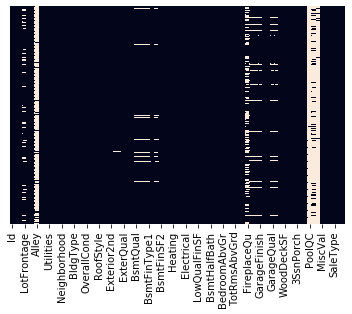

In [11]:
# Creating a heatmap plotting the NULL entries in the columns.
# The white bar represents the missing values.
_= sns.heatmap(df.isnull(), cbar=False, yticklabels=False)

In [14]:
# Dropping the Alley, PoolQC, Fence and MiscFeature columns.
df.drop(['Alley'],axis=1,inplace=True)
df.drop(['Id'],axis=1,inplace=True)
df.drop(['PoolQC', 'Fence', 'MiscFeature'],axis=1,inplace=True)


In [15]:
# Replace NULL values with mean value for the column
df['LotFrontage']= df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['MasVnrArea']= df['MasVnrArea'].fillna(df['MasVnrArea'].mean())
df['BsmtFullBath']= df['BsmtFullBath'].fillna(df['BsmtFullBath'].mean()) 
df['HalfBath']= df['HalfBath'].fillna(df['HalfBath'].mean())

In [16]:
# Replace NULL values with mode value of the column
df['FireplaceQu']= df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['BsmtQual']= df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['BsmtCond']= df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtExposure']= df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType1']= df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['BsmtFinType2']= df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['MasVnrType']= df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['GarageType']= df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageYrBlt']= df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode()[0])
df['GarageFinish']= df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']= df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']= df['GarageCond'].fillna(df['GarageCond'].mode()[0])
df['Electrical']= df['Electrical'].fillna(df['Electrical'].mode()[0])


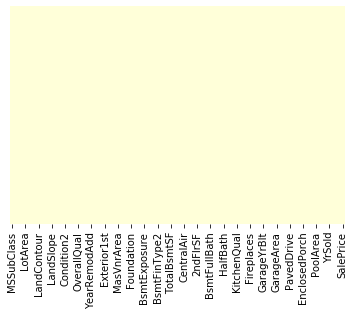

In [17]:
# Creating a heatmap plotting the NULL entries in the columns.
# The white bar represents the missing values.

_= sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='YlGnBu')

In [18]:
df.shape

(1460, 76)

In [19]:
# Finding the total NULL entries per feature/ column
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
                ..
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch   

In [20]:
df.dropna(inplace=True)

In [21]:
df.shape

(1460, 76)

In [22]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [23]:
# Extracting the categorical variable names into a list
cat_cols = df.select_dtypes(include=np.object).columns.tolist()
len(cat_cols)

39

In [24]:
print(cat_cols)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [25]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [26]:
main_df= df.copy()

In [27]:
# Combine Test Data
test_df= pd.read_csv('processedtest1.csv')

In [28]:
test_df.shape

(1459, 75)

In [29]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [30]:
final_df= pd.concat([df, test_df], axis=0)

/home/priyam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [31]:
final_df['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
5       143000.0
6       307000.0
7       200000.0
8       129900.0
9       118000.0
10      129500.0
11      345000.0
12      144000.0
13      279500.0
14      157000.0
15      132000.0
16      149000.0
17       90000.0
18      159000.0
19      139000.0
20      325300.0
21      139400.0
22      230000.0
23      129900.0
24      154000.0
25      256300.0
26      134800.0
27      306000.0
28      207500.0
29       68500.0
          ...   
1429         NaN
1430         NaN
1431         NaN
1432         NaN
1433         NaN
1434         NaN
1435         NaN
1436         NaN
1437         NaN
1438         NaN
1439         NaN
1440         NaN
1441         NaN
1442         NaN
1443         NaN
1444         NaN
1445         NaN
1446         NaN
1447         NaN
1448         NaN
1449         NaN
1450         NaN
1451         NaN
1452         NaN
1453         NaN
1454         NaN
1455         NaN
1456         N

In [32]:
final_df.shape

(2919, 76)

In [37]:
final_df=category_onehot_multcols(cat_cols)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [38]:
final_df.shape

(2919, 237)

In [39]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [40]:
final_df.shape

(2919, 177)

In [41]:
final_df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,0,0,0,0,1,0,0,0,1,0
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,0,0,0,0,1,0,0,0,1,0
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,0,0,0,0,1,0,0,0,1,0
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,0,0,0,0,1,0,0,0,0,0
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,0,0,0,0,1,0,0,0,1,0


In [42]:
df_final= final_df.dropna()

In [45]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(df_final, df_final.SalePrice, train_size=0.65,test_size=0.35, random_state=101)
print ("X_train: ", X_train)
print ("y_train: ", y_train)
print("X_test: ", X_test)
print ("y_test: ", y_test)

X_train:        1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtFinSF1  BsmtFinSF2  \
757        672       714          0             3       438.0         0.0   
970        720       472          0             4         0.0         0.0   
440       2402         0          0             2      1767.0       539.0   
1219       672       546          0             3         0.0         0.0   
856       1026         0          0             3       505.0       435.0   
1155      1437         0          0             3      1157.0         0.0   
900        858         0          0             2       322.0         0.0   
925       1126         0          0             3       767.0        93.0   
1091       624       628          0             2       510.0         0.0   
271       1363         0          0             2       226.0      1063.0   
1270      1332       192          0             0      1258.0         0.0   
534        707       707          0             3         0.0     

In [55]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [56]:
model_ridge = Ridge()

In [57]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

Text(0, 0.5, 'rmse')

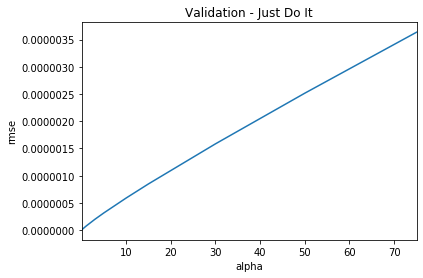

In [58]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [59]:
cv_ridge.min()

4.116309575268424e-09

In [60]:
# Trying out Lasso

model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y_train)

/home/priyam/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [61]:
rmse_cv(model_lasso).mean()

/home/priyam/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/priyam/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/priyam/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/priyam/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.

0.44734550773804643

In [62]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)

In [63]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 59 variables and eliminated the other 118 variables


In [64]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

Text(0.5, 1.0, 'Coefficients in the Lasso Model')

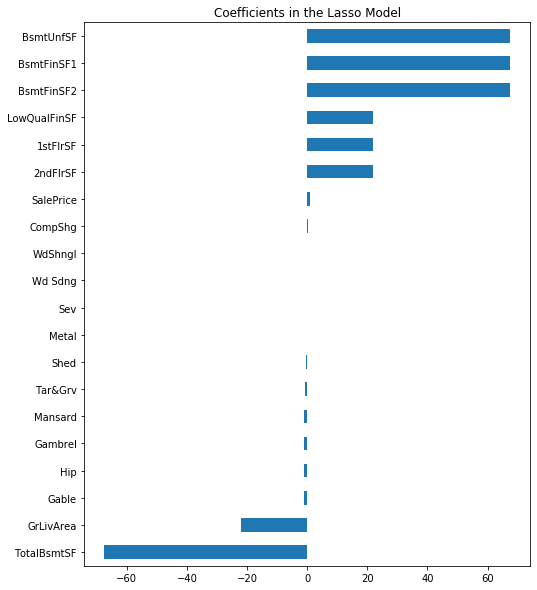

In [67]:
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

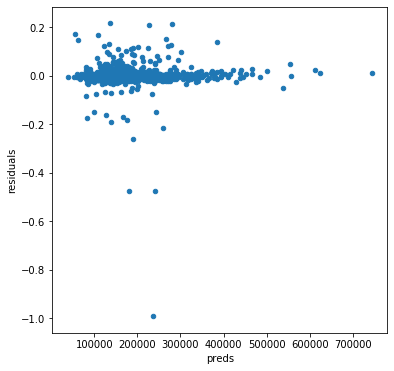

In [69]:
#Residuals
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model_lasso.predict(X_train), "true":y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

In [84]:
#xgboost
import xgboost as xgb

dtrain= xgb.DMatrix(X_train, label=y_train)
dtest= xgb.DMatrix(X_test)

params= {"max_depth":2, "eta":0.1}
model= xgb.cv(params, dtrain, num_boost_round=500, early_stopping_rounds=100)

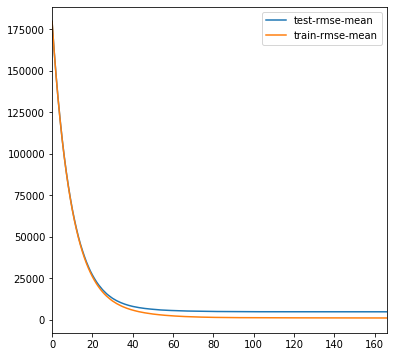

In [82]:
model.loc[:,["test-rmse-mean", "train-rmse-mean"]].plot()

In [77]:
model_xgb = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1) #the params were tuned using xgb.cv
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=360, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [87]:
y_pred= classifier.predict(X_test)

In [88]:
y_pred

array([256612.36 , 145551.14 , 151459.72 , 408731.16 , 398934.94 ,
       114741.76 , 135920.83 , 142947.47 , 145658.88 , 136397.42 ,
       109371.766, 139730.11 , 127823.625, 168206.97 , 160098.64 ,
       156278.8  , 119378.09 , 127008.57 , 175826.19 , 217071.16 ,
       155420.97 ,  38415.914, 179494.67 , 152121.62 , 249667.7  ,
       160942.89 , 124382.055, 156043.05 , 163548.3  ,  93334.75 ,
       205387.64 , 168910.38 , 174900.6  , 293159.22 ,  38215.555,
       109379.64 , 389109.4  , 200482.38 , 127977.766,  90951.484,
       267499.44 , 192557.16 , 224890.67 , 187640.95 , 108315.95 ,
       164256.11 , 305202.2  , 172773.16 , 114466.445,  96461.57 ,
       124792.14 , 243853.73 , 131222.23 , 172521.23 , 171776.03 ,
       135702.83 , 198571.9  , 216179.11 , 185095.86 , 225127.08 ,
       189473.23 , 146627.11 , 145720.66 ,  90416.45 , 114441.266,
       178870.95 ,  90550.13 , 237807.02 , 156457.2  , 179433.2  ,
       180165.27 , 131553.78 , 206286.53 , 154096.23 , 115844.

In [89]:
pred= pd.DataFrame(y_pred)

In [90]:
sub_df= pd.read_csv('capstone_data/sample_submission.csv')

In [91]:
datasets= pd.concat([sub_df['Id'],pred], axis=1)

In [92]:
datasets.columns= ['Id', 'SalePrice']

In [93]:
datasets.to_csv('capstone_data/sample_submission.csv', index=False)